<a href="https://colab.research.google.com/github/mtran14/AUglove/blob/main/schz_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/PORQ_demographicsClinicalCharacteristics_LABELS.csv"
df = pd.read_csv(file_path)
headers = list(df.columns)
data = df.values

In [ ]:
cains_exp = ['Item 10: Facial Expression', 'Item 11: Vocal Expression', 'Item 12: Expressive Gestures', 'Item 13: Quantity of Speech']
painss_col = headers[218:228]

In [ ]:
painss_col = [headers[219], headers[221], headers[222], headers[223], headers[224]]

In [ ]:
participant_col = data[:,0]
labels = []
for feature in cains_exp:
  labels_dict = {}
  label_col = data[:, headers.index(feature)]
  for i in range(data.shape[0]):
    try:
      current_id = int(participant_col[i])
    except:
      continue
    current_label = label_col[i]
    if(current_label == current_label):
      current_label = int(current_label.split('(')[1].split(')')[0])
      labels_dict[current_id] = current_label
  labels.append(labels_dict)

In [ ]:
participant_col = data[:,0]
labels = []
for feature in painss_col:
  labels_dict = {}
  label_col = data[:, headers.index(feature)]
  for i in range(data.shape[0]):
    try:
      current_id = int(participant_col[i])
    except:
      continue
    current_label = label_col[i]
    if(current_label == current_label):
      current_label = int(current_label)
      labels_dict[current_id] = current_label
  labels.append(labels_dict)

In [ ]:
labels[0]

{7001: 4,
 7002: 1,
 7003: 1,
 7005: 1,
 7006: 1,
 7007: 3,
 7008: 1,
 7009: 3,
 7010: 1,
 7011: 1,
 7012: 1,
 7013: 5,
 7014: 1,
 7016: 1,
 7017: 1,
 7020: 1,
 7022: 1,
 7024: 5,
 7027: 4,
 7029: 1,
 7030: 1,
 7033: 3,
 7034: 4,
 7037: 2,
 7039: 4,
 7040: 1,
 7041: 2,
 7042: 1,
 7043: 1,
 7044: 1,
 7045: 3,
 7050: 2,
 7053: 4,
 7055: 1,
 7057: 1,
 7061: 3,
 7063: 4,
 7064: 4,
 7065: 2,
 7066: 3,
 7067: 1,
 7068: 1,
 7069: 4,
 7074: 1,
 7077: 1,
 7079: 2,
 7082: 1,
 7083: 2,
 7084: 1,
 7085: 2,
 7087: 2,
 7088: 1,
 7094: 4,
 7096: 5,
 7097: 3}

In [ ]:
remove_id = [8093,7061, 8074, 8072, 8071, 7077]

In [ ]:
def filter_files(filename):
    valid_info = []
    drugcond_data = pd.read_excel("/content/drive/MyDrive/PORQ_drugUnblinding.xlsx").values
    for row in drugcond_data:
        valid_info.append(row[:-1])

    for sess_info in valid_info:
        current_id = sess_info[0]
        current_day = sess_info[1]
        current_timestamp = str(sess_info[2])[:10]

        if(str(current_id) in filename and \
           "Day" + str(current_day) in filename and \
           current_timestamp in filename):
            return sess_info[3]
    return ""


def ccc(y_true, y_pred):
    cor=np.corrcoef(y_true,y_pred)[0][1]
    
    mean_true=np.mean(y_true)
    mean_pred=np.mean(y_pred)
    
    var_true=np.var(y_true)
    var_pred=np.var(y_pred)
    
    sd_true=np.std(y_true)
    sd_pred=np.std(y_pred)
    
    numerator=2*cor*sd_true*sd_pred
    
    denominator=var_true+var_pred+(mean_true-mean_pred)**2

    return numerator/denominator

In [ ]:
import pandas as pd
distance_threshold = 1.75

freq_threshold = 500
data_freq = pd.read_csv("/content/drive/MyDrive/cluster_counter_1000.csv", header=None).values
unk_clusters = []
for i in range(data_freq.shape[0]):
    if(data_freq[i][1] <= freq_threshold):
        unk_clusters.append(i)

In [ ]:
import re 

X = []
y = []
y_file = []
max_len = 20000
data = pd.read_csv("/content/drive/MyDrive/schz_info1000.csv", header=None).values
sentences = []
target = []

condition_t = "OT"
# session = "feel"
pid_dict = {}

skip_list = []
for i in range(data.shape[0]):
  split = data[i][1]
  file = data[i][0]
  participant_id = int(re.findall(r'\d+', file)[0])
  if(participant_id in remove_id):
    continue
  condition = filter_files(file)
  # if(condition != condition_t and participant_id < 8000):
  #   continue
  if(participant_id < 8000):
    continue
  pid_dict[participant_id] = 0
  if('watch' in file):
    continue

  row = data[i][2]
  row = row.replace('\n','')
  tokens = row.split()
  assert len(tokens) % 2 == 0
  text_part = tokens[0:len(tokens)//2]
  distances_part = tokens[len(tokens)//2:len(tokens)]
  current_str = ''
  for i in range(min(len(text_part), max_len)):
      current_token = text_part[i]
      current_distance = float(distances_part[i])
      if(current_distance <= distance_threshold):
          current_cluster_in_int = int(current_token[1:])
          if(current_cluster_in_int not in unk_clusters):
              current_str += current_token + ' '
          else:
              current_str += '<unk> '
      else:
          current_str += '<unk> '
  current_str = current_str.strip()
  current_str_list = current_str.strip()
  X.append(current_str)
  y.append(participant_id)
  y_file.append(file)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np
import random
nfold = 10
import pandas as pd
import re
mseed = 42
kf = KFold(n_splits=nfold, random_state = mseed, shuffle=True)
fold_info = []
fold_file = []
unique_ids = list(set(y))

for train_index, test_index in kf.split(y):
  X_train, X_test = np.array(X)[train_index], np.array(X)[test_index]
  y_train_id, y_test_id = np.array(y)[train_index], np.array(y)[test_index]
  y_train_file, y_test_file = np.array(y_file)[train_index], np.array(y_file)[test_index]
  fold_info.append([X_train, X_test, y_train_id, y_test_id])
  fold_file.append([y_train_file, y_test_file])
# filter_unique_ids = []
# for id in unique_ids:
#   if(id in labels[0].keys()):
#     filter_unique_ids.append(id)

# for train_index, test_index in kf.split(filter_unique_ids):
#   train_ids, test_ids = np.array(filter_unique_ids)[train_index], np.array(filter_unique_ids)[test_index]
#   X_train, X_test = [], []
#   y_train_id, y_test_id = [], []
#   y_train_file, y_test_file = [], []
#   for i in range(len(y)):
#     if(y[i] in train_ids):
#       X_train.append(X[i])
#       y_train_id.append(y[i])
#       y_train_file.append(y_file[i])
#     elif(y[i] in test_ids):
#       X_test.append(X[i])
#       y_test_id.append(y[i])
#       y_test_file.append(y_file[i])
#   fold_info.append([X_train, X_test, y_train_id, y_test_id])
#   fold_file.append([y_train_file, y_test_file])

443

In [ ]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

for l in range(len(painss_col)):
  overall = []
  for f in range(nfold):
    X_train = fold_info[f][0]
    X_test = fold_info[f][1]
    y_train_id = fold_info[f][2]
    y_test_id = fold_info[f][3]
    
    n_val = len(X_train) // 4
    X_val = X_train[:n_val]
    X_train = X_train[n_val:]
    y_val_id = y_train_id[:n_val]
    y_train_id = y_train_id[n_val:]
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    x_val = []
    y_val = []
    
    for  i in (range(len(y_train_id))):
      participant_id = y_train_id[i]
      y_train.append(labels[l][participant_id])
      x_train.append(X_train[i])

    for i in range(len(y_val_id)):
      try:
        participant_id = y_val_id[i]
        y_val.append(labels[l][participant_id])
        x_val.append(X_val[i])
      except:
        continue

    for i in range(len(y_test_id)):
      try:
        participant_id = y_test_id[i]
        y_test.append(labels[l][participant_id])
        x_test.append(X_test[i])
      except:
        continue
  
    print("length: ", len(x_train)+len(x_test)+len(x_val))
    distribution = np.zeros((6,1))
    for val in y_train:
      distribution[val-1] += 1
    distribution /= distribution.sum()
    scores = []
    n_iter = 50

    for x in range(n_iter):
      pred_test = []
      test_label = np.array(y_test).reshape(-1,1)
      for i in range(test_label.shape[0]):
        pred_test.append(np.random.choice(np.arange(0, 6), p=list(distribution.reshape(-1,))))

      current_rmse = mean_squared_error(test_label, pred_test, squared=False)
      current_pcc, p_val = pearsonr(np.array(pred_test, dtype=float).reshape(-1,), np.array(test_label, dtype=float).reshape(-1,))
      current_ccc = ccc(np.array(test_label, dtype=float).reshape(-1,), np.array(pred_test, dtype=float).reshape(-1,))
      scores.append([abs(current_pcc), abs(current_ccc), current_rmse])
    scores = np.array(scores)
    fold_score = list(np.mean(scores, axis=0))
    # print(fold_score)
    overall.append(fold_score)
  cv_score = np.mean(np.array(overall), axis=0)
  print(painss_col[l], cv_score)
    

In [ ]:
x_train

[]

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, GRU, Dropout
from keras.datasets import imdb
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers.normalization import BatchNormalization
from keras import backend as K
import tensorflow_probability as tfp

def tf_pearson(y_true, y_pred):
    # return tf.contrib.metrics.streaming_pearson_correlation(y_pred, y_true)[1]
    return abs(tfp.stats.correlation(y_true, y_pred))

def tf_pearson_loss(y_true, y_pred):
    return 1 - abs(tfp.stats.correlation(y_true, y_pred))

early_stopping_monitor = EarlyStopping(
      monitor = 'val_loss',
      min_delta = 0,
      patience = 10,
      verbose = 1,
      mode = 'auto',
      baseline=None,
      restore_best_weights=True
    )
def tf_pearson(y_true, y_pred):
    # return tf.contrib.metrics.streaming_pearson_correlation(y_pred, y_true)[1]
    return -abs(tfp.stats.correlation(y_true, y_pred))

# for l in range(len(painss_col)):
for l in [4]:
  overall = []
  for f in range(nfold):
    X_train = fold_info[f][0]
    X_test = fold_info[f][1]
    y_train_id = fold_info[f][2]
    y_test_id = fold_info[f][3]
    
    n_val = len(X_train) // 4
    X_val = X_train[:n_val]
    X_train = X_train[n_val:]
    y_val_id = y_train_id[:n_val]
    y_train_id = y_train_id[n_val:]
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    x_val = []
    y_val = []
    

    for  i in (range(len(y_train_id))):
      try:
        participant_id = y_train_id[i]
        y_train.append(labels[l][participant_id])
        # y_train.append(labels[0][participant_id]+labels[1][participant_id]+labels[2][participant_id]+labels[3][participant_id])
        x_train.append(X_train[i])
      except:
        continue

    for i in range(len(y_val_id)):
      try:
        participant_id = y_val_id[i]
        y_val.append(labels[l][participant_id])
        # y_val.append(labels[0][participant_id]+labels[1][participant_id]+labels[2][participant_id]+labels[3][participant_id])
        x_val.append(X_val[i])
      except:
        continue

    for i in range(len(y_test_id)):
      try:
        participant_id = y_test_id[i]
        y_test.append(labels[l][participant_id])
        # y_test.append(labels[0][participant_id]+labels[1][participant_id]+labels[2][participant_id]+labels[3][participant_id])
        x_test.append(X_test[i])
      except:
        continue

    max_features = 20000
    # cut texts after this number of words (among top max_features most common words)
    maxlen = 50
    batch_size = 8
    # print(len(x_train), 'train sequences')
    # print(len(x_test), 'test sequences')
    # print(len(x_val), 'validation sequences')
    t = Tokenizer()
    t.fit_on_texts(x_train)
    vocab_size = len(t.word_index) + 1
    sequences_train = t.texts_to_sequences(x_train)
    sequences_test = t.texts_to_sequences(x_test)
    sequences_val = t.texts_to_sequences(x_val)

    datatrain = pad_sequences(sequences_train, maxlen=maxlen*6)[:,::6]
    datatest = pad_sequences(sequences_test, maxlen=maxlen*6)[:,::6]
    dataval = pad_sequences(sequences_val, maxlen=maxlen*6)[:,::6]

    word2ind_data = pd.read_csv("/content/drive/MyDrive/word2ind_1000.csv", header=None).values
    ind2word = {}
    for i in range(word2ind_data.shape[0]):
      current_row = word2ind_data[i]
      ind2word[current_row[1]] = current_row[0]

    embeddings_index = dict()
    data_embed = pd.read_csv("/content/drive/MyDrive/glove_embeddings_25_1000cluster.csv", header=None).values
    for i in range(data_embed.shape[0]):
        word = ind2word[i]
        coefs = data_embed[i]
        embeddings_index[word] = coefs
    emb_size = data_embed.shape[1]

    # print('Loaded %s word vectors.' % len(embeddings_index))
    # create a weight matrix for words in training docs
    embedding_matrix = zeros((vocab_size, emb_size))
    for word, i in t.word_index.items():
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector  

    scaler = MinMaxScaler((-1,1))
    scaler.fit(np.array(y_train).reshape(-1,1))
    y_train = scaler.transform(np.array(y_train).reshape(-1,1))
    y_val = scaler.transform(np.array(y_val).reshape(-1,1))
    y_test_normed = scaler.transform(np.array(y_test).reshape(-1,1))

    model = Sequential()
    model.add(Embedding(vocab_size, 25, input_length=maxlen, embeddings_regularizer="l1_l2"))
    # model.add(Embedding(vocab_size, emb_size, weights=[embedding_matrix], input_length=maxlen, trainable=True))
    model.add(Bidirectional(LSTM(32, dropout=0.4)))
    # model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    # model.add(BatchNormalization())
    model.add(Dense(1))

    model.compile(loss='mse', optimizer='adam')
    model.fit(datatrain, y_train, batch_size=batch_size, validation_data=(dataval, y_val), epochs=10, verbose=0, callbacks=[early_stopping_monitor])

    y_test_pred = model(datatest).numpy()
    y_test = np.array(y_test)
    pcc, pv = pearsonr(y_test_pred.reshape(-1,), np.array(y_test).reshape(-1,))
   
    mae = mean_absolute_error(y_test.reshape(-1,), scaler.inverse_transform(y_test_pred).reshape(-1,))
    mse = mean_squared_error(y_test.reshape(-1,), scaler.inverse_transform(y_test_pred).reshape(-1,), squared=False)
    concordance = ccc(np.array(y_test).reshape(-1,), y_test_pred.reshape(-1,))
    # print('Fold', f, pcc, mae, mse, concordance)
    overall.append([abs(pcc), mae, mse])
  print(painss_col[l], np.mean(np.array(overall), axis=0))
  # print("sum cains: ", np.mean(np.array(overall), axis=0))
  # break
#persecution: 0.45
#delusions: 0.48
#hallucinations: 0.60
#flow: 0.50
#disorg: 0.45

13. Conceptual Disorganization [0.1157592  1.29483543 1.53337085]


In [ ]:
import tqdm
import os
import pandas as pd

filepath = "/content/drive/MyDrive/schz_segment/"
data_dict = {}
for f in tqdm.tqdm(os.listdir(filepath)):
  filedir = os.path.join(filepath, f)
  of_data = pd.read_csv(filedir).values[::5]
  keep_row = of_data[:,3] > 0
  au_data = of_data[keep_row,396:413]
  data_dict[f] = au_data

 74%|███████▍  | 1847/2494 [19:29<06:22,  1.69it/s]/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,24

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, GRU, Dropout
from keras.datasets import imdb
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers.normalization import BatchNormalization
from keras import backend as K
import tensorflow_probability as tfp

early_stopping_monitor = EarlyStopping(
      monitor = 'val_loss',
      min_delta = 0,
      patience = 10,
      verbose = 1,
      mode = 'auto',
      baseline=None,
      restore_best_weights=True
    )

for l in range(len(painss_col)):
  overall = []
  for f in range(nfold):
    X_train = fold_info[f][0]
    X_test = fold_info[f][1]
    y_train_id = fold_info[f][2]
    y_test_id = fold_info[f][3]
    y_train_file, y_test_file = fold_file[f]

    n_val = len(X_train) // 4
    X_val = X_train[:n_val]
    X_train = X_train[n_val:]
    y_val_id = y_train_id[:n_val]
    y_train_id = y_train_id[n_val:]
    y_val_file = y_train_file[:n_val]
    y_train_file = y_train_file[n_val:]
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    x_val = []
    y_val = []
    

    for  i in range(len(y_train_id)):
      try:
        participant_id = y_train_id[i]
        y_train.append(labels[l][participant_id])
        # y_train.append(labels[0][participant_id]+labels[1][participant_id]+labels[2][participant_id]+labels[3][participant_id])
        x_train.append(data_dict[y_train_file[i]])
      except:
        continue

    for i in range(len(y_val_id)):
      try:
        participant_id = y_val_id[i]
        y_val.append(labels[l][participant_id])
        # y_val.append(labels[0][participant_id]+labels[1][participant_id]+labels[2][participant_id]+labels[3][participant_id])
        x_val.append(data_dict[y_val_file[i]])
      except:
        continue

    for i in range(len(y_test_id)):
      try:
        participant_id = y_test_id[i]
        y_test.append(labels[l][participant_id])
        # y_test.append(labels[0][participant_id]+labels[1][participant_id]+labels[2][participant_id]+labels[3][participant_id])
        x_test.append(data_dict[y_test_file[i]])
      except:
        continue

    max_features = 20000
    maxlen = 50
    batch_size = 8

    datatrain = pad_sequences(x_train, maxlen=maxlen*6)[:,::6]
    datatest = pad_sequences(x_test, maxlen=maxlen*6)[:,::6]
    dataval = pad_sequences(x_val, maxlen=maxlen*6)[:,::6]  

    scaler_y = MinMaxScaler((-1,1))
    scaler_y.fit(np.array(y_train).reshape(-1,1))
    y_train = scaler_y.transform(np.array(y_train).reshape(-1,1))
    y_val = scaler_y.transform(np.array(y_val).reshape(-1,1))
    y_test_normed = scaler_y.transform(np.array(y_test).reshape(-1,1))

    from sklearn.preprocessing import MinMaxScaler, StandardScaler

    scaler = StandardScaler()
    num_instances, num_time_steps, num_features = datatrain.shape
    datatrain = np.reshape(datatrain, (-1, num_features))
    datatrain = scaler.fit_transform(datatrain)
    datatrain = np.reshape(datatrain, (num_instances, num_time_steps, num_features))

    num_instances, num_time_steps, num_features = datatest.shape
    datatest = np.reshape(datatest, (-1, num_features))
    datatest = scaler.transform(datatest)
    datatest = np.reshape(datatest, (num_instances, num_time_steps, num_features))

    num_instances, num_time_steps, num_features = dataval.shape
    dataval = np.reshape(dataval, (-1, num_features))
    dataval = scaler.transform(dataval)
    dataval = np.reshape(dataval, (num_instances, num_time_steps, num_features))

    y_train = np.array(y_train).reshape(-1,1)
    y_test = np.array(y_test).reshape(-1,1)
    y_val = np.array(y_val).reshape(-1,1)
    model = Sequential()
    model.add(Bidirectional(LSTM(32, dropout=0.4, input_shape=(num_time_steps, num_features))))
    # model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    # model.add(BatchNormalization())
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='adam')
    model.fit(datatrain, y_train, batch_size=batch_size, validation_data=(dataval, y_val), epochs=10, verbose=0, callbacks=[early_stopping_monitor])

    y_test_pred = model(datatest).numpy()
    # y_test_pred = model.predict(datatest)
    y_test = np.array(y_test)
    # print(y_test_pred, y_test)
    pcc, pv = pearsonr(y_test_pred.reshape(-1,), y_test.reshape(-1,))
    concordance_corr = ccc(y_test.reshape(-1,), y_test_pred.reshape(-1,))
    mae = mean_absolute_error(y_test.reshape(-1,), scaler_y.inverse_transform(y_test_pred).reshape(-1,))
    mse = mean_squared_error(y_test.reshape(-1,), scaler_y.inverse_transform(y_test_pred).reshape(-1,), squared=False)
    # print('Fold', f, abs(pcc), mae, mse, abs(concordance_corr))
    overall.append([abs(pcc), mae, mse, abs(concordance_corr)])
  print(painss_col[l], np.nanmean(np.array(overall), axis=0))
  # print("Sum cains: ", np.nanmean(np.array(overall), axis=0))
  # break
  
#todo: subject independent, concordance metric

1. Unusual Thought Content [0.33076906 0.63359897 0.79219795 0.02654813]
2. Delusions [0.43072712 1.03439888 1.28578713 0.0503138 ]
3. Grandiosity [0.35963443 0.70083289 0.96268774 0.026921  ]
4. Suspiciousness/Persecution [0.41082746 0.90161115 1.15874905 0.03955623]
5. Hallucinatory Behavior [0.52494664 1.06100309 1.28562489 0.07662693]
8. Lack of Spontaneity/Flow of Conversation [0.47129895 0.93537019 1.21117667 0.06325442]
13. Conceptual Disorganization [0.39348966 1.19321887 1.47291433 0.04099083]
14. Incoherent Speech [0.36467364 0.39037942 0.61384407 0.04123306]
15. Poverty of Speech Content [0.48071664 0.69722194 1.01982627 0.06465736]
27. Stereotyped Thinking [0.58550321 0.47151305 0.66216806 0.07196325]


In [ ]:
data_dict

In [ ]:
1. Unusual Thought Content [0.37641689 0.62583188 0.78146806]
2. Delusions [0.45598167 1.01667796 1.26429792]
3. Grandiosity [0.42287821 0.69225508 0.92630035]
4. Suspiciousness/Persecution [0.41403915 0.92549729 1.16376807]
5. Hallucinatory Behavior [0.51576388 1.0850613  1.32093953]
8. Lack of Spontaneity/Flow of Conversation [0.52956511 0.91626444 1.16354095]
13. Conceptual Disorganization [0.37427621 1.17155935 1.44654859]
14. Incoherent Speech [0.404256   0.39820497 0.59459416]
15. Poverty of Speech Content [0.47557492 0.76629316 1.05509985]
27. Stereotyped Thinking [0.58982405 0.46023293 0.64768111]

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, GRU, Dropout
from keras.datasets import imdb
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers.normalization import BatchNormalization
from keras import backend as K
import tensorflow_probability as tfp

def tf_pearson(y_true, y_pred):
    # return tf.contrib.metrics.streaming_pearson_correlation(y_pred, y_true)[1]
    return abs(tfp.stats.correlation(y_true, y_pred))

def tf_pearson_loss(y_true, y_pred):
    return 1 - abs(tfp.stats.correlation(y_true, y_pred))

early_stopping_monitor = EarlyStopping(
      monitor = 'val_loss',
      min_delta = 0,
      patience = 10,
      verbose = 1,
      mode = 'auto',
      baseline=None,
      restore_best_weights=True
    )
def tf_pearson(y_true, y_pred):
    # return tf.contrib.metrics.streaming_pearson_correlation(y_pred, y_true)[1]
    return -abs(tfp.stats.correlation(y_true, y_pred))
std_stream_output = []
for l in range(len(painss_col)):
  overall = []
  for f in range(nfold):
    X_train = fold_info[f][0]
    X_test = fold_info[f][1]
    y_train_id = fold_info[f][2]
    y_test_id = fold_info[f][3]
    y_train_file, y_test_file = fold_file[f]

    n_val = len(X_train) // 4
    X_val = X_train[:n_val]
    X_train = X_train[n_val:]
    y_val_id = y_train_id[:n_val]
    y_train_id = y_train_id[n_val:]
    y_val_file = y_train_file[:n_val]
    y_train_file = y_train_file[n_val:]
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    x_val = []
    y_val = []
    

    for  i in range(len(y_train_id)):
      try:
        participant_id = y_train_id[i]
        y_train.append(labels[l][participant_id])
        # y_train.append(labels[0][participant_id]+labels[1][participant_id]+labels[2][participant_id]+labels[3][participant_id])
        x_train.append(data_dict[y_train_file[i]])
      except:
        continue

    for i in range(len(y_val_id)):
      try:
        participant_id = y_val_id[i]
        y_val.append(labels[l][participant_id])
        # y_val.append(labels[0][participant_id]+labels[1][participant_id]+labels[2][participant_id]+labels[3][participant_id])
        x_val.append(data_dict[y_val_file[i]])
      except:
        continue

    for i in range(len(y_test_id)):
      try:
        participant_id = y_test_id[i]
        y_test.append(labels[l][participant_id])
        # y_test.append(labels[0][participant_id]+labels[1][participant_id]+labels[2][participant_id]+labels[3][participant_id])
        x_test.append(data_dict[y_test_file[i]])
      except:
        continue

    max_features = 20000
    # cut texts after this number of words (among top max_features most common words)
    maxlen = 50
    batch_size = 8

    train = []
    val = []
    test = []

    for mdata in x_train:
      mdata = np.array(mdata, dtype=float)
      train.append(np.concatenate((np.mean(mdata, axis=0), np.std(mdata, axis=0), np.mean(np.diff(mdata, axis=0), axis=0)), axis = 0))

    for mdata in x_val:
      mdata = np.array(mdata, dtype=float)
      val.append(np.concatenate((np.mean(mdata, axis=0), np.std(mdata, axis=0), np.mean(np.diff(mdata, axis=0), axis=0)), axis = 0))

    for mdata in x_test:
      mdata = np.array(mdata, dtype=float)
      test.append(np.concatenate((np.mean(mdata, axis=0), np.std(mdata, axis=0), np.mean(np.diff(mdata, axis=0), axis=0)), axis = 0))
       
    train = np.array(train)
    test = np.array(test)
    val = np.array(val)

    scaler_y = MinMaxScaler((-1,1))
    scaler_y.fit(np.array(y_train).reshape(-1,1))
    y_train = scaler_y.transform(np.array(y_train).reshape(-1,1))
    y_val = scaler_y.transform(np.array(y_val).reshape(-1,1))
    y_test_normed = scaler_y.transform(np.array(y_test).reshape(-1,1))
    
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression, LinearRegression
    from sklearn.metrics import balanced_accuracy_score
    from collections import Counter
    from sklearn.impute import SimpleImputer
    import warnings
    from sklearn.utils.testing import ignore_warnings
    from sklearn.exceptions import ConvergenceWarning
    ignore_warnings(category=ConvergenceWarning)

    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp = imp.fit(train)
    train = imp.transform(train)
    val = imp.transform(val)
    test = imp.transform(test)

    # class_weight = {1:1, 0:1.5*class_cnt[1]/class_cnt[0]}
    kernels = ["rbf"]
    Cs = [0.1, 1, 10, 100, 1000]
    bestC = 0
    best_kernels = "rbf"
    best_val_mse = 100000
    # for kernel in kernels:
    # for C in Cs:
    #   # clf = SVC(C=C, kernel=kernel).fit(train, y_train)
    #   clf = LogisticRegression(C=C, max_iter=1000).fit(train, y_train)
    #   y_val_pred = clf.predict(val)
    #   current_mse = mean_squared_error(y_val, y_val_pred)
    #   if(current_mse < best_val_mse):
    #     bestC = C
    #     # best_kernels = kernel
    best_clf = LinearRegression().fit(train,y_train)

    y_test_pred = best_clf.predict(test)
    y_test = np.array(y_test)

    pcc, pv = pearsonr(y_test_pred.reshape(-1,), y_test.reshape(-1,))
    mae = mean_absolute_error(y_test.reshape(-1,), scaler_y.inverse_transform(y_test_pred).reshape(-1,))
    mse = mean_squared_error(y_test.reshape(-1,), scaler_y.inverse_transform(y_test_pred).reshape(-1,), squared=False)

    # print('Fold', f, pcc, mae, mse)
    overall.append([abs(pcc), mae, mse])
  print(painss_col[l], np.mean(np.array(overall), axis=0))
  # print("Sum cains: ", np.mean(np.array(overall), axis=0))
  # break
  std_stream_output.append([painss_col[l], np.mean(np.array(overall), axis=0)])
print(std_stream_output)


In [ ]:
for row in std_stream_output:
  print(row[0], row[1])

1. Unusual Thought Content [0.39011831 0.77248268 1.55887308]
2. Delusions [0.41539365 1.16491927 1.93902749]
3. Grandiosity [0.40741091 0.96527166 2.21417   ]
4. Suspiciousness/Persecution [0.30543922 1.2172843  2.3903584 ]
5. Hallucinatory Behavior [0.36718655 1.45769048 3.15796052]
8. Lack of Spontaneity/Flow of Conversation [0.36320329 1.30457911 2.9050492 ]
13. Conceptual Disorganization [0.39765452 1.57559015 3.92849478]
14. Incoherent Speech [0.34524138 0.70040527 1.94911008]
15. Poverty of Speech Content [0.38227485 0.94200389 1.64134452]
27. Stereotyped Thinking [0.45035865 0.73325363 1.82261815]


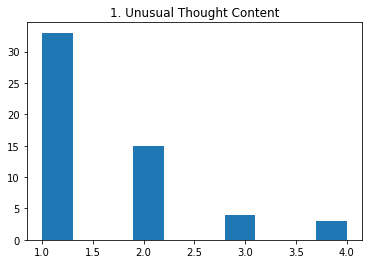

1.5818181818181818 0.8461873656887341


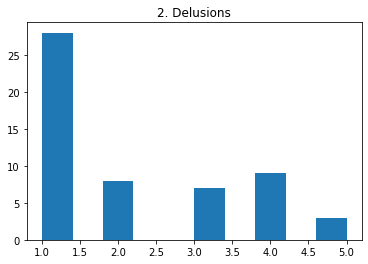

2.109090909090909 1.3303824094492156


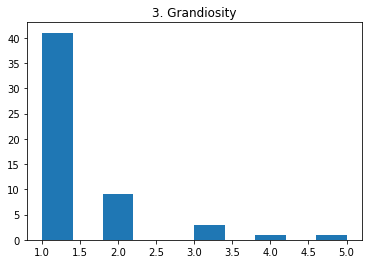

1.4 0.8224133002108103


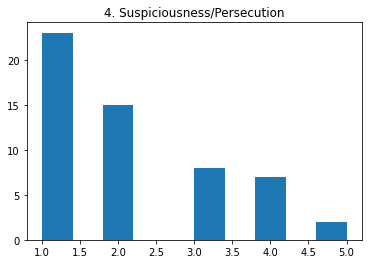

2.090909090909091 1.1797184143642425


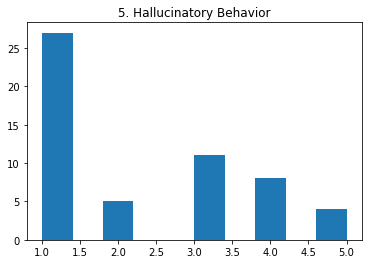

2.2181818181818183 1.371010365200644


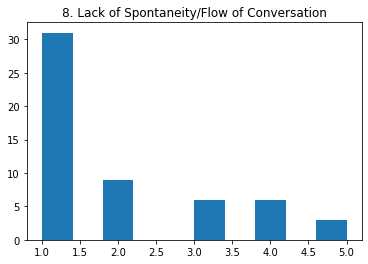

1.9272727272727272 1.2628185712134792


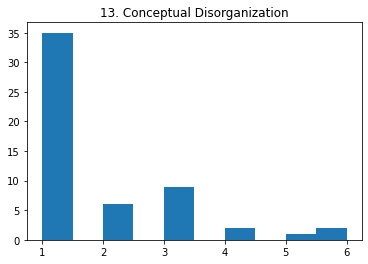

1.8 1.2848770722948912


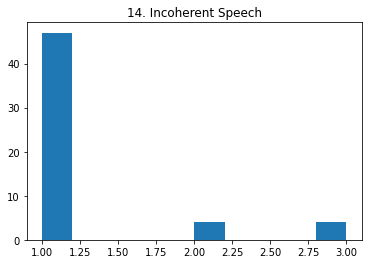

1.2181818181818183 0.5621681757723748


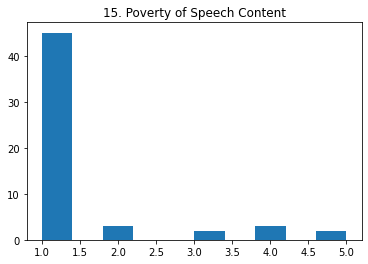

1.4363636363636363 1.040343236430543


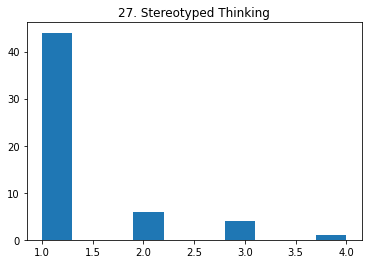

1.309090909090909 0.6841777353537011


In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
  current_label_dict = labels[i]
  scores = []
  for key in current_label_dict.keys():
    scores.append(current_label_dict[key])
  scores = np.array(scores)
  plt.hist(scores)
  plt.title(painss_col[i])
  plt.show()
  print(np.mean(scores), np.std(scores))

In [ ]:
len(labels)

10

In [ ]:
feature_path = "/content/drive/MyDrive/baseline_schizophrenia_features.csv"
data = pd.read_csv(feature_path, header=None).values
data_feature_dict = {}
for i in range(data.shape[0]):
  data_feature_dict[data[i][0]] = data[i][1:]

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, GRU, Dropout
from keras.datasets import imdb
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers.normalization import BatchNormalization
from keras import backend as K
import tensorflow_probability as tfp
from sklearn.svm import SVR

def tf_pearson(y_true, y_pred):
    # return tf.contrib.metrics.streaming_pearson_correlation(y_pred, y_true)[1]
    return abs(tfp.stats.correlation(y_true, y_pred))

def tf_pearson_loss(y_true, y_pred):
    return 1 - abs(tfp.stats.correlation(y_true, y_pred))

early_stopping_monitor = EarlyStopping(
      monitor = 'val_loss',
      min_delta = 0,
      patience = 10,
      verbose = 1,
      mode = 'auto',
      baseline=None,
      restore_best_weights=True
    )
def tf_pearson(y_true, y_pred):
    # return tf.contrib.metrics.streaming_pearson_correlation(y_pred, y_true)[1]
    return -abs(tfp.stats.correlation(y_true, y_pred))
std_stream_output = []
for l in range(len(painss_col)):
  overall = []
  for f in range(nfold):
    X_train = fold_info[f][0]
    X_test = fold_info[f][1]
    y_train_id = fold_info[f][2]
    y_test_id = fold_info[f][3]
    y_train_file, y_test_file = fold_file[f]

    n_val = len(X_train) // 4
    X_val = X_train[:n_val]
    X_train = X_train[n_val:]
    y_val_id = y_train_id[:n_val]
    y_train_id = y_train_id[n_val:]
    y_val_file = y_train_file[:n_val]
    y_train_file = y_train_file[n_val:]
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    x_val = []
    y_val = []
    

    for  i in range(len(y_train_id)):
      try:
        participant_id = y_train_id[i]
        y_train.append(labels[l][participant_id])
        # y_train.append(labels[0][participant_id]+labels[1][participant_id]+labels[2][participant_id]+labels[3][participant_id])
        x_train.append(data_feature_dict[y_train_file[i]])
      except:
        continue

    for i in range(len(y_val_id)):
      try:
        participant_id = y_val_id[i]
        y_val.append(labels[l][participant_id])
        # y_val.append(labels[0][participant_id]+labels[1][participant_id]+labels[2][participant_id]+labels[3][participant_id])
        x_val.append(data_feature_dict[y_val_file[i]])
      except:
        continue

    for i in range(len(y_test_id)):
      try:
        participant_id = y_test_id[i]
        y_test.append(labels[l][participant_id])
        # y_test.append(labels[0][participant_id]+labels[1][participant_id]+labels[2][participant_id]+labels[3][participant_id])
        x_test.append(data_feature_dict[y_test_file[i]])
      except:
        continue

    max_features = 20000
    # cut texts after this number of words (among top max_features most common words)
    maxlen = 50
    batch_size = 8

    train = x_train
    val = x_val
    test = x_test

    # for mdata in x_train:
    #   mdata = np.array(mdata, dtype=float)
    #   train.append(np.concatenate((np.mean(mdata, axis=0), np.std(mdata, axis=0), np.mean(np.diff(mdata, axis=0), axis=0)), axis = 0))

    # for mdata in x_val:
    #   mdata = np.array(mdata, dtype=float)
    #   val.append(np.concatenate((np.mean(mdata, axis=0), np.std(mdata, axis=0), np.mean(np.diff(mdata, axis=0), axis=0)), axis = 0))

    # for mdata in x_test:
    #   mdata = np.array(mdata, dtype=float)
    #   test.append(np.concatenate((np.mean(mdata, axis=0), np.std(mdata, axis=0), np.mean(np.diff(mdata, axis=0), axis=0)), axis = 0))
       
    train = np.array(train)
    test = np.array(test)
    val = np.array(val)

    scaler_y = MinMaxScaler((-1,1))
    scaler_y.fit(np.array(y_train).reshape(-1,1))
    y_train = scaler_y.transform(np.array(y_train).reshape(-1,1))
    y_val = scaler_y.transform(np.array(y_val).reshape(-1,1))
    y_test_normed = scaler_y.transform(np.array(y_test).reshape(-1,1))
    
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression, LinearRegression
    from sklearn.metrics import balanced_accuracy_score
    from collections import Counter
    from sklearn.impute import SimpleImputer
    import warnings
    from sklearn.utils.testing import ignore_warnings
    from sklearn.exceptions import ConvergenceWarning
    ignore_warnings(category=ConvergenceWarning)

    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp = imp.fit(train)
    train = imp.transform(train)
    val = imp.transform(val)
    test = imp.transform(test)

    # class_weight = {1:1, 0:1.5*class_cnt[1]/class_cnt[0]}
    kernels = ["rbf"]
    Cs = [0.1, 1, 10, 100, 1000]
    bestC = 0
    best_kernels = "rbf"
    best_val_mse = 100000
    # for kernel in kernels:
    # for C in Cs:
    #   # clf = SVC(C=C, kernel=kernel).fit(train, y_train)
    #   clf = LogisticRegression(C=C, max_iter=1000).fit(train, y_train)
    #   y_val_pred = clf.predict(val)
    #   current_mse = mean_squared_error(y_val, y_val_pred)
    #   if(current_mse < best_val_mse):
    #     bestC = C
    #     # best_kernels = kernel
    # best_clf = LinearRegression().fit(train,y_train)
    best_clf = SVR(C=1).fit(train, y_train.ravel())
    y_test_pred = best_clf.predict(test)
    y_test = np.array(y_test)

    pcc, pv = pearsonr(y_test_pred.reshape(-1,), y_test.reshape(-1,))
    mae = mean_absolute_error(y_test.reshape(-1,), scaler_y.inverse_transform(y_test_pred.reshape(-1,1)).reshape(-1,))
    mse = mean_squared_error(y_test.reshape(-1,), scaler_y.inverse_transform(y_test_pred.reshape(-1,1)).reshape(-1,), squared=False)

    # print('Fold', f, pcc, mae, mse)
    overall.append([abs(pcc), mae, mse])
  print(painss_col[l], np.mean(np.array(overall), axis=0))
  # print("Sum cains: ", np.mean(np.array(overall), axis=0))
  
  std_stream_output.append([painss_col[l], np.mean(np.array(overall), axis=0)])
print(std_stream_output)

1. Unusual Thought Content [0.30723126 0.59355137 0.79163973]
2. Delusions [0.34927184 1.08218432 1.3453445 ]
3. Grandiosity [0.21948244 0.66241679 1.00616413]
4. Suspiciousness/Persecution [0.36494407 0.91597088 1.21373076]
5. Hallucinatory Behavior [0.43372344 1.07869645 1.41378073]
8. Lack of Spontaneity/Flow of Conversation [0.47402897 0.85715004 1.26953469]
13. Conceptual Disorganization [0.37798397 1.02799215 1.41627962]
14. Incoherent Speech [0.36862519 0.34251207 0.60453095]
15. Poverty of Speech Content [0.51586563 0.64969423 0.9994545 ]
27. Stereotyped Thinking [0.58056758 0.42337057 0.654755  ]
[['1. Unusual Thought Content', array([0.30723126, 0.59355137, 0.79163973])], ['2. Delusions', array([0.34927184, 1.08218432, 1.3453445 ])], ['3. Grandiosity', array([0.21948244, 0.66241679, 1.00616413])], ['4. Suspiciousness/Persecution', array([0.36494407, 0.91597088, 1.21373076])], ['5. Hallucinatory Behavior', array([0.43372344, 1.07869645, 1.41378073])], ['8. Lack of Spontaneity/

In [ ]:
C = 1
1. Unusual Thought Content [0.30723126 0.59355137 0.79163973]
2. Delusions [0.34927184 1.08218432 1.3453445 ]
3. Grandiosity [0.20244287 0.66241679 1.00616413]
4. Suspiciousness/Persecution [0.36494407 0.91597088 1.21373076]
5. Hallucinatory Behavior [0.43372344 1.07869645 1.41378073]
8. Lack of Spontaneity/Flow of Conversation [0.47402897 0.85715004 1.26953469]
13. Conceptual Disorganization [0.37798397 1.02799215 1.41627962]
14. Incoherent Speech [0.36862519 0.34251207 0.60453095]
15. Poverty of Speech Content [0.51586563 0.64969423 0.9994545 ]
27. Stereotyped Thinking [0.58056758 0.42337057 0.654755  ]

C=10
1. Unusual Thought Content [0.26243992 0.63439981 0.84429492]
2. Delusions [0.45009769 1.04003559 1.31152274]
3. Grandiosity [0.26268681 0.72415032 1.04386309]
4. Suspiciousness/Persecution [0.30289717 0.99284025 1.27144751]
5. Hallucinatory Behavior [0.51567857 0.99901373 1.31305093]
8. Lack of Spontaneity/Flow of Conversation [0.4731294  0.89789717 1.26997976]
13. Conceptual Disorganization [0.41785448 1.02665481 1.41533431]
14. Incoherent Speech [0.42633251 0.34234266 0.59579157]
15. Poverty of Speech Content [0.55752256 0.6579772  1.00180983]
27. Stereotyped Thinking [0.58670682 0.43925591 0.66657546]

C=100
1. Unusual Thought Content [0.18004972 0.80842253 1.11260205]
2. Delusions [0.31097106 1.31109495 1.75006271]
3. Grandiosity [0.30757238 0.83808972 1.14285538]
4. Suspiciousness/Persecution [0.26008496 1.16763412 1.55150102]
5. Hallucinatory Behavior [0.41173728 1.14310827 1.58249759]
8. Lack of Spontaneity/Flow of Conversation [0.35907561 1.11825606 1.52704389]
13. Conceptual Disorganization [0.3924987  1.27213528 1.75058395]
14. Incoherent Speech [0.36223527 0.43565762 0.7018747 ]
15. Poverty of Speech Content [0.53757995 0.76754211 1.14355159]
27. Stereotyped Thinking [0.56347525 0.53268323 0.76627679]

C=1000
1. Unusual Thought Content [0.14637111 1.21225114 1.73948089]
2. Delusions [0.19788756 1.83796757 2.73113998]
3. Grandiosity [0.25095545 1.25416653 1.80224995]
4. Suspiciousness/Persecution [0.22730693 1.67904179 2.42350819]
5. Hallucinatory Behavior [0.27762704 1.69080008 2.42291285]
8. Lack of Spontaneity/Flow of Conversation [0.23401845 1.68600791 2.39402082]
13. Conceptual Disorganization [0.34071145 1.90768854 2.83490476]
14. Incoherent Speech [0.27339187 0.66123627 1.03546093]
15. Poverty of Speech Content [0.43038829 1.19275058 1.80630309]
27. Stereotyped Thinking [0.39754205 0.8700117  1.28855256]

[['1. Unusual Thought Content', array([0.30723126, 0.59355137, 0.79163973])],
 ['2. Delusions', array([0.34927184, 1.08218432, 1.3453445 ])],
 ['3. Grandiosity', array([0.20244287, 0.66241679, 1.00616413])],
 ['4. Suspiciousness/Persecution',
  array([0.36494407, 0.91597088, 1.21373076])],
 ['5. Hallucinatory Behavior', array([0.43372344, 1.07869645, 1.41378073])],
 ['8. Lack of Spontaneity/Flow of Conversation',
  array([0.47402897, 0.85715004, 1.26953469])],
 ['13. Conceptual Disorganization',
  array([0.37798397, 1.02799215, 1.41627962])],
 ['14. Incoherent Speech', array([0.36862519, 0.34251207, 0.60453095])],
 ['15. Poverty of Speech Content',
  array([0.51586563, 0.64969423, 0.9994545 ])],
 ['27. Stereotyped Thinking', array([0.58056758, 0.42337057, 0.654755  ])]]

In [ ]:
np.concatenate((np.mean(mdata, axis=0), np.std(mdata, axis=0), np.mean(np.diff(mdata, axis=0), axis=0)))